<a href="https://colab.research.google.com/github/77HarshKumar/Machine-learning/blob/main/Machine_Learning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
iris=pd.read_csv('/content/drive/MyDrive/data/archive.zip')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

In [4]:
iris=sns.load_dataset('iris')


In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
iris.shape

(150, 5)

In [8]:
iris['petal_length'].nunique()

43

MEAN 


In [9]:
iris['petal_length'].mean()

3.7580000000000005

In [10]:
iris['petal_length'].max()

6.9

In [11]:
iris['petal_length'].min()

1.0

**Data Visualization**
     

**Scatter Plot**

Text(0.5, 1.0, 'Scatter plot of sepal length and sepal width  on iris dataset')

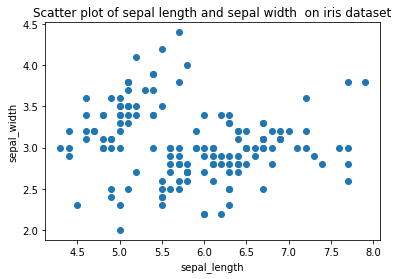

In [12]:
plt.scatter(iris['sepal_length'],iris['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Scatter plot of sepal length and sepal width  on iris dataset')

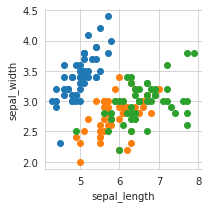

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species")\
.map(plt.scatter,"sepal_length","sepal_width")
plt.show()

Change the set style in the above plot.Also how you figure out which color for which species

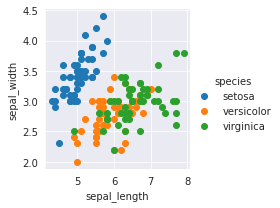

In [14]:
sns.set_style("darkgrid")
sns.FacetGrid(iris,hue="species")\
.map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()

**Pair Plot**

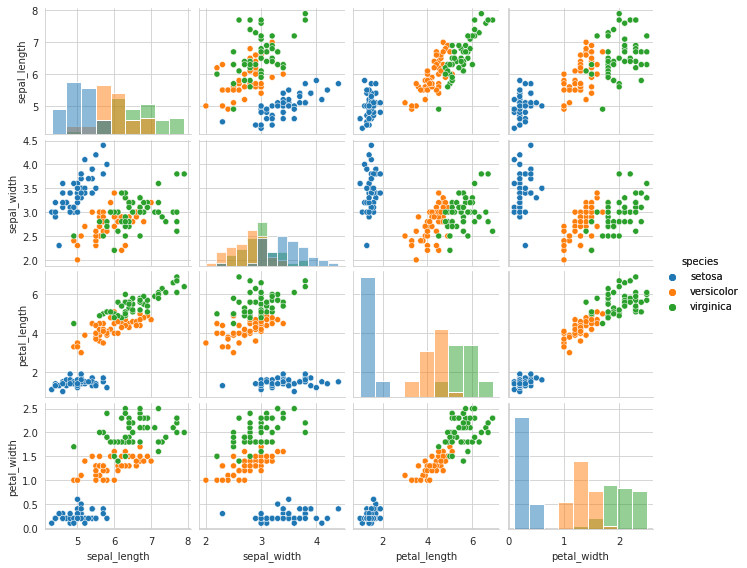

In [15]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=2,diag_kind="hist").add_legend()

plt.show()

**Box Plot**

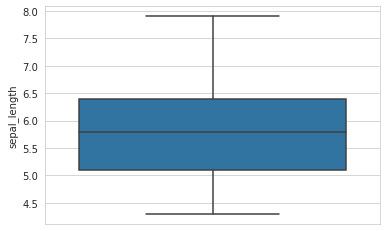

In [16]:
sns.boxplot(y="sepal_length",data=iris)

Draw the boxplot for petal length


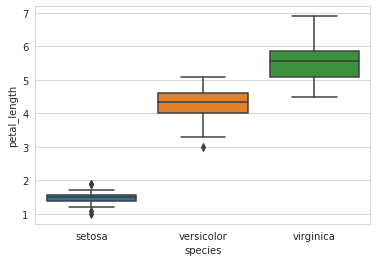

In [17]:
sns.boxplot(x="species",y="petal_length",data=iris)

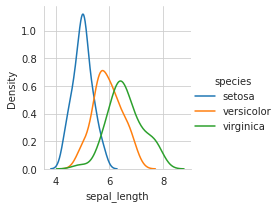

In [18]:
#Kernel Distribution estimate
sns.FacetGrid(iris,hue="species",height=3)\
.map(sns.kdeplot,"sepal_length")\
.add_legend()

plt.show()

**Line Plot**

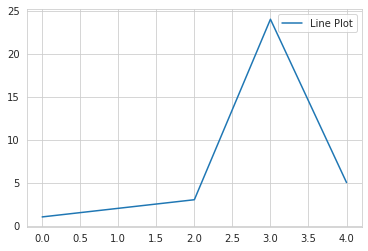

In [19]:
y=[1,2,3,24,5]
plt.plot(y,label="Line Plot")
plt.legend()
plt.show()

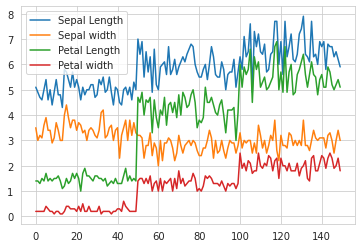

In [21]:
#line plot
plt.plot(iris["sepal_length"],label="Sepal Length")
plt.plot(iris["sepal_width"],label="Sepal width")
plt.plot(iris["petal_length"],label="Petal Length")
plt.plot(iris["petal_width"],label="Petal width")
plt.legend()
plt.show()

**Corelation**

In [22]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


**HeatMap**

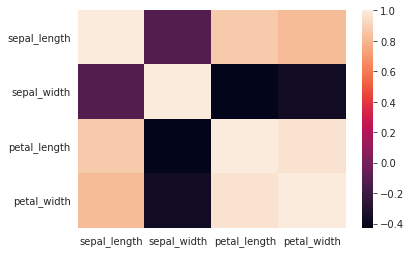

In [23]:
sns.heatmap(iris.corr())

Add annotations to heatmap


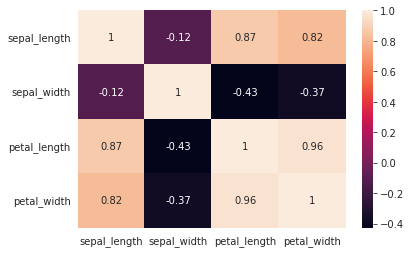

In [24]:
sns.heatmap(iris.corr(),annot=True)

**Histogram**

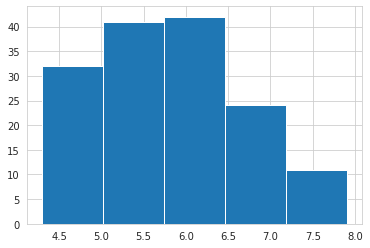

In [25]:
plt.hist(iris['sepal_length'],bins=5)
plt.show()

In [30]:
x=iris.drop(['species'],axis=1)

In [31]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
Y=iris['species']

In [27]:
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Train test split**

In [32]:
x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.4)

Add random satate to train test split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=1)

**Logistic Regresssion**

In [34]:
lr=LogisticRegression(solver='newton-cg')

In [35]:
lr.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [36]:
y_pred1=lr.predict(x_test)

**Get the confusion matrix**

In [37]:
confusion_matrix(y_test,y_pred1)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(0.5, 15.0, 'Predicted Label')

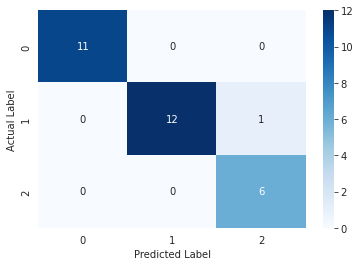

In [38]:
sns.heatmap(data=confusion_matrix(y_test,y_pred1),annot=True,cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

**Accuracy score**

In [39]:
accuracy_score(y_test,y_pred1)

0.9666666666666667

**Decision Tree**

In [40]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)


DecisionTreeClassifier()

In [41]:
y_pred2=dtree.predict(x_test)

Get the confusion matrix ,heatmap for confusion matrix and accuracy store

In [42]:
confusion_matrix(y_test,y_pred2)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(0.5, 15.0, 'Predicted Label')

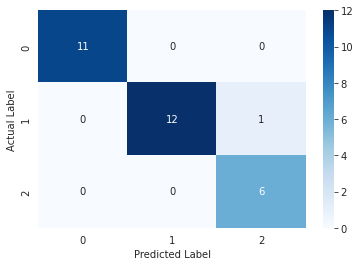

In [43]:
sns.heatmap(data=confusion_matrix(y_test,y_pred2),annot=True,cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [44]:
accuracy_score(y_test,y_pred2)

0.9666666666666667

In [45]:
iris.columns[:4]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

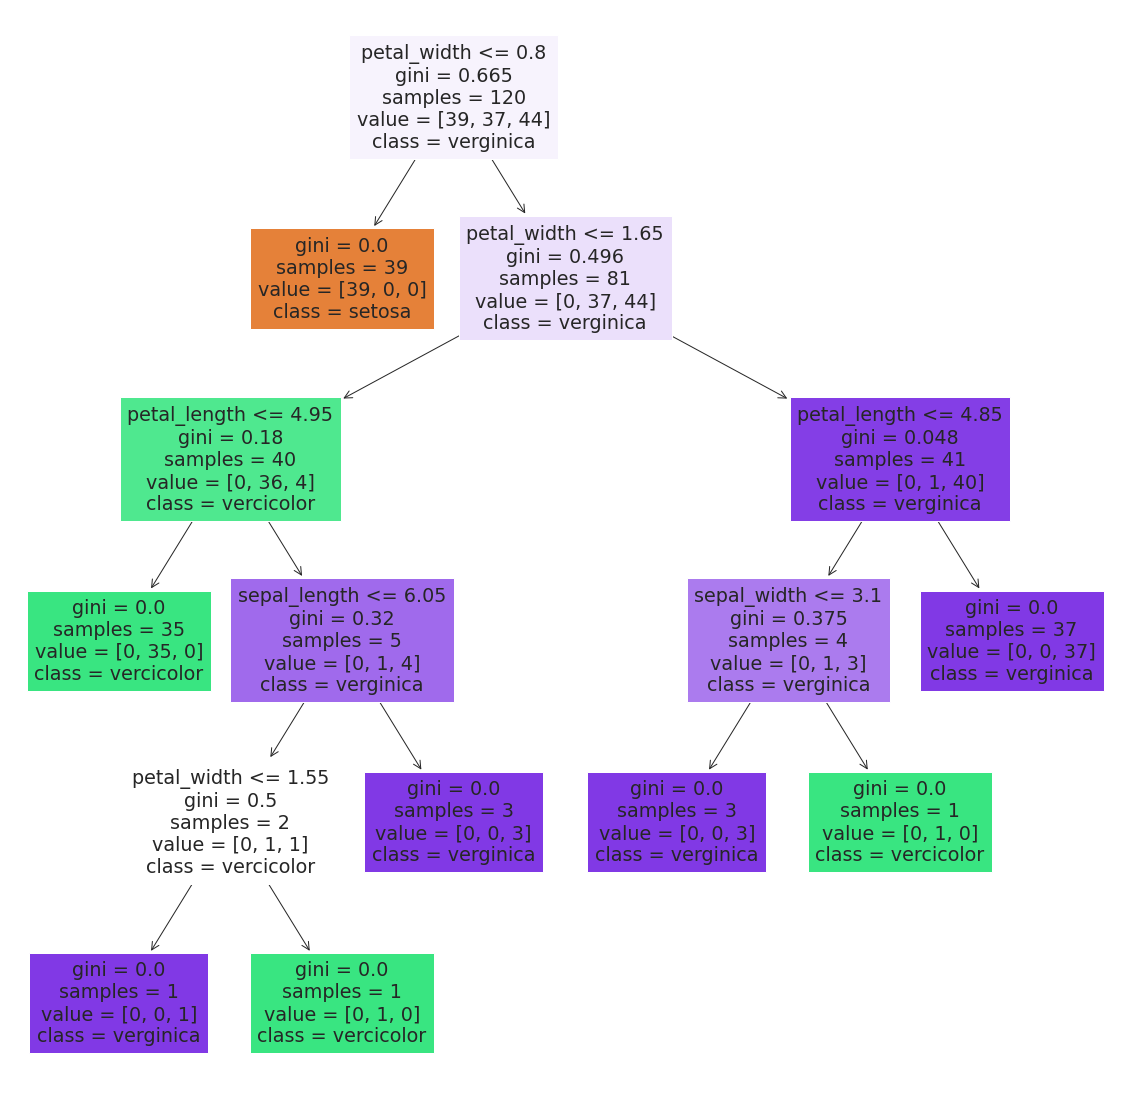

In [46]:
plt.figure(figsize=(20,20))
dec_tree=plot_tree(decision_tree=dtree,feature_names=iris.columns[:-1],class_names=["setosa","vercicolor","verginica"],filled=True)

**Random Forest**

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
clf=RandomForestClassifier(n_estimators=2000)

Use 100 decision trees in random forest

In [49]:
clf=RandomForestClassifier(n_estimators=100)

In [50]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred3=clf.predict(x_test)

Get the confusion matrix ,heatmap for confusion matrix and accuracy store

In [52]:
confusion_matrix(y_test,y_pred3)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(0.5, 15.0, 'Predicted Label')

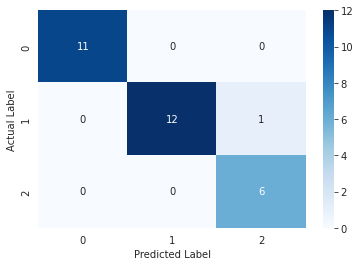

In [53]:
sns.heatmap(data=confusion_matrix(y_test,y_pred2),annot=True,cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [54]:
accuracy_score(y_test,y_pred2)

0.9666666666666667